# Monochrome Symphony

This art is inspired by the flow and rhythm of waves and the interplay of light and shadow in generative patterns. It employs mathematical sinusoidal and cosine functions to create a dynamic, evolving visual.

### Inspiration
This piece draws influence from:
- **Op Art (Optical Art)**: The geometric and wave-based patterns reminiscent of artists like [Bridget Riley](https://en.wikipedia.org/wiki/Bridget_Riley).
- **Digital Generative Art**: Inspired by the creative possibilities in programming, as seen in platforms like [Processing](https://processing.org).

For more inspiration, check out this beautiful example of generative art:
[Monochrome Waves - Generative Art Example on Behance](https://www.behance.net/gallery/76832139/Generative-Art)


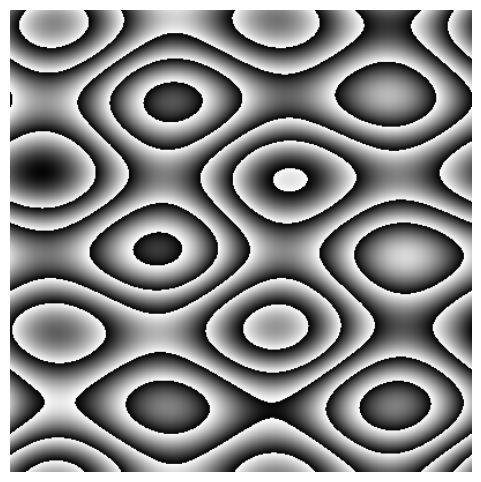

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def generate_moving_art_fast(width=400, height=400, frames=100, intensity=0.5):
    # Create a figure and axis for the animation
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axis('off')  # Turn off axes
    canvas = np.zeros((height, width, 3))  # Canvas to hold RGB values
    img = ax.imshow(canvas, interpolation='bilinear', animated=True)

    # Pre-generate a meshgrid for fast computation
    x = np.linspace(0, 2 * np.pi, width)
    y = np.linspace(0, 2 * np.pi, height)
    X, Y = np.meshgrid(x, y)

    # Define the update function for animation
    def update(frame):
        phase = frame * 0.1  # Control speed of animation
        for c in range(3):  # Generate RGB channels
            canvas[:, :, c] = (
                np.sin(X * 2 + phase) +
                np.cos(Y * 3 - phase) +
                intensity * np.sin((X + Y) + frame / 10)
            ) % 1  # Modulo ensures values stay in range [0, 1]
        img.set_array(np.clip(canvas, 0, 1))
        return [img]

    # Create and save animation
    anim = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)
    anim.save("moving_art_fast.mp4", fps=30, dpi=150, extra_args=['-vcodec', 'libx264'])
    plt.show()

# Generate moving abstract art
generate_moving_art_fast()

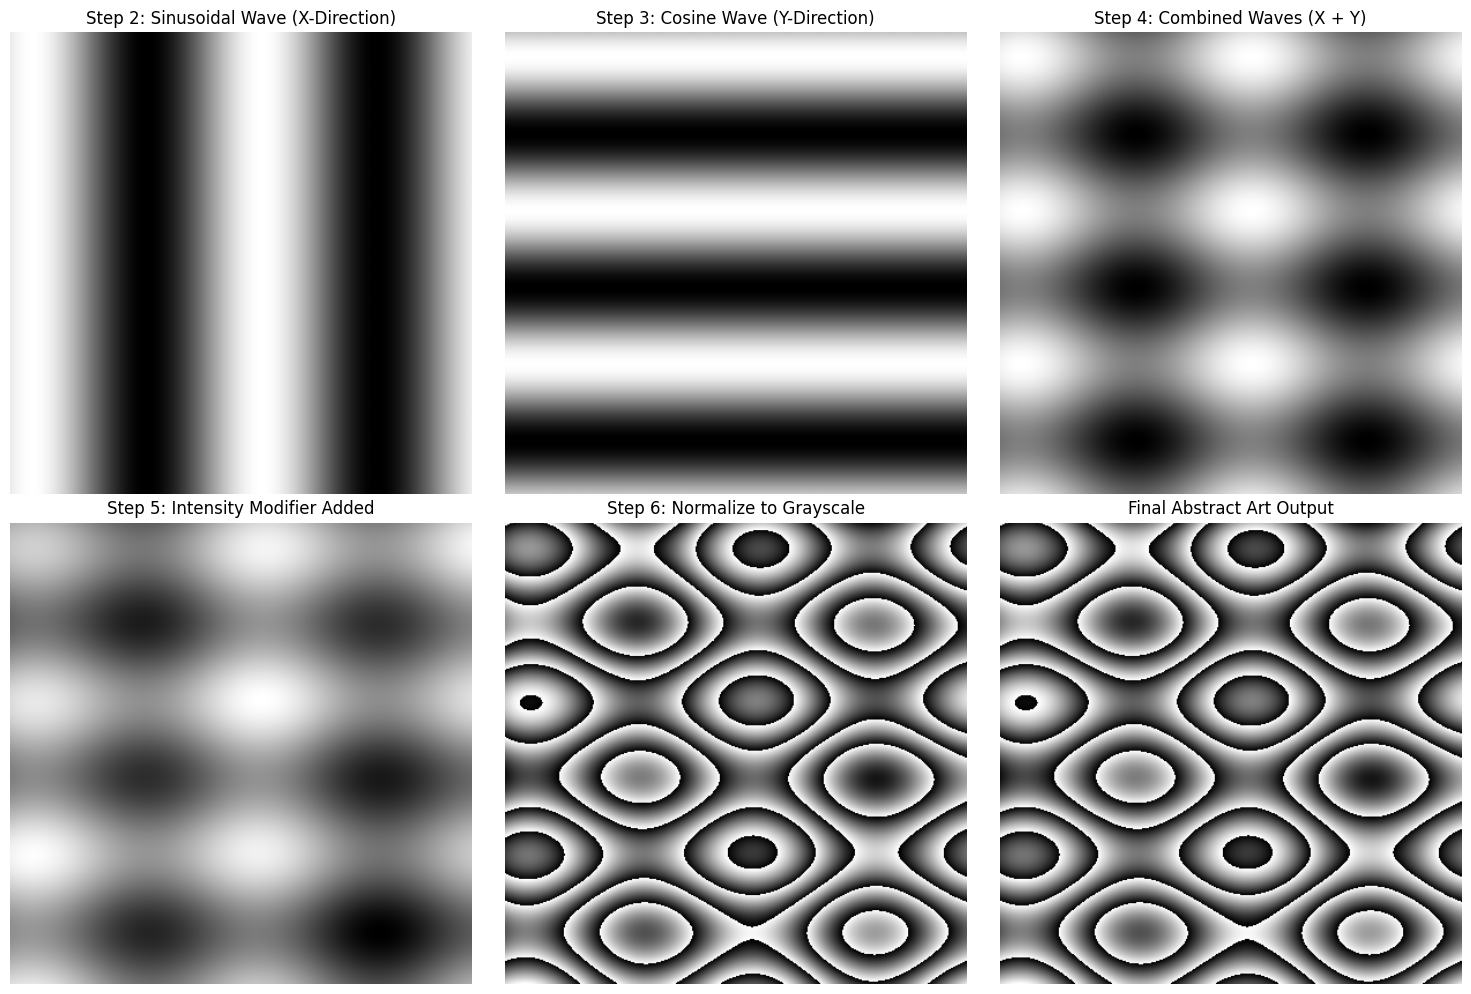

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_by_step_art_demo_bw(width=400, height=400, frame=10, intensity=0.5):
    # Step 1: Create a blank canvas
    canvas = np.zeros((height, width))  # Canvas for grayscale
    x = np.linspace(0, 2 * np.pi, width)
    y = np.linspace(0, 2 * np.pi, height)
    X, Y = np.meshgrid(x, y)

    # Visualization of steps
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.ravel()  # Flatten axis for easier indexing

    # Step 2: Sinusoidal wave (X-direction)
    wave_x = np.sin(X * 2 + frame * 0.1)
    axs[0].imshow(wave_x, cmap='gray', interpolation='bilinear')
    axs[0].set_title("Step 2: Sinusoidal Wave (X-Direction)")
    axs[0].axis('off')

    # Step 3: Cosine wave (Y-direction)
    wave_y = np.cos(Y * 3 - frame * 0.1)
    axs[1].imshow(wave_y, cmap='gray', interpolation='bilinear')
    axs[1].set_title("Step 3: Cosine Wave (Y-Direction)")
    axs[1].axis('off')

    # Step 4: Combine X and Y waves
    combined_waves = wave_x + wave_y
    axs[2].imshow(combined_waves, cmap='gray', interpolation='bilinear')
    axs[2].set_title("Step 4: Combined Waves (X + Y)")
    axs[2].axis('off')

    # Step 5: Add a global intensity modifier
    intensity_wave = intensity * np.sin((X + Y + frame) / 2)
    combined_with_intensity = combined_waves + intensity_wave
    axs[3].imshow(combined_with_intensity, cmap='gray', interpolation='bilinear')
    axs[3].set_title("Step 5: Intensity Modifier Added")
    axs[3].axis('off')

    # Step 6: Map to grayscale (normalize values)
    canvas = (combined_with_intensity) % 1  # Keep values in [0, 1]
    axs[4].imshow(canvas, cmap='gray', interpolation='bilinear')
    axs[4].set_title("Step 6: Normalize to Grayscale")
    axs[4].axis('off')

    # Final Step: Full Abstract Art
    axs[5].imshow(np.clip(canvas, 0, 1), cmap='gray', interpolation='bilinear')
    axs[5].set_title("Final Abstract Art Output")
    axs[5].axis('off')

    plt.tight_layout()
    plt.show()

# Generate step-by-step black-and-white demo for one frame
step_by_step_art_demo_bw()

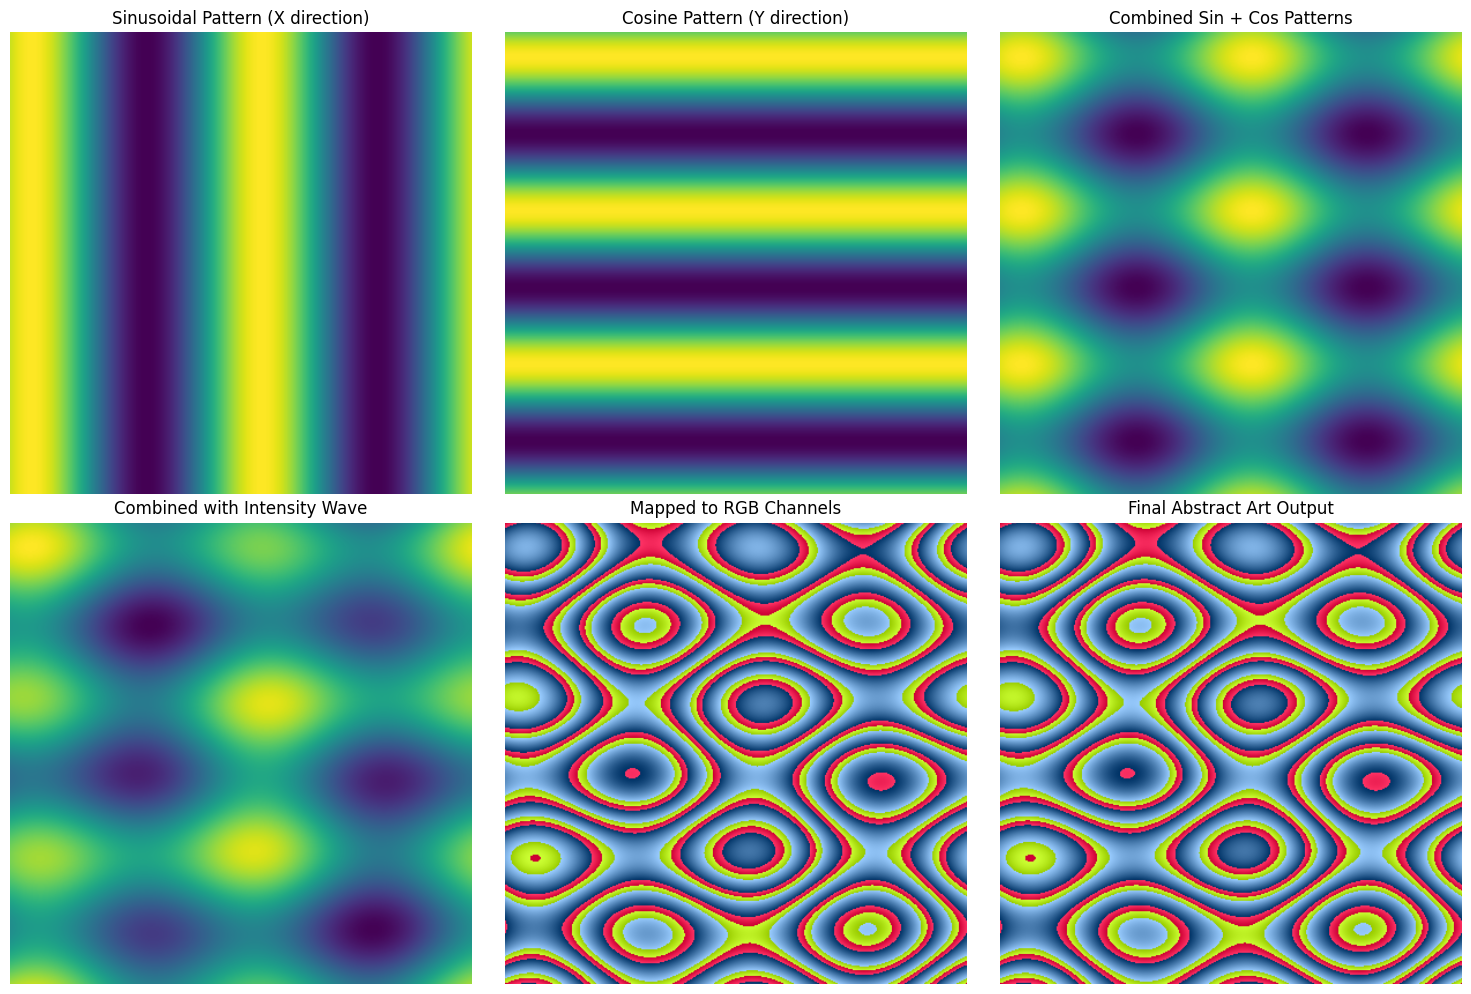

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def visualize_moving_art_steps(width=400, height=400, frame=10, intensity=0.5):
    # Create a figure for visualization
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.ravel()  # Flatten axis for easier indexing

    # Step 1: Setup canvas and meshgrid
    canvas = np.zeros((height, width, 3))
    x = np.linspace(0, 2 * np.pi, width)
    y = np.linspace(0, 2 * np.pi, height)
    X, Y = np.meshgrid(x, y)

    # Step 2: Sinusoidal pattern (X direction)
    sin_x = np.sin(X * 2 + frame * 0.1)
    axs[0].imshow(sin_x, interpolation='bilinear')
    axs[0].set_title("Sinusoidal Pattern (X direction)")
    axs[0].axis('off')

    # Step 3: Cosine pattern (Y direction)
    cos_y = np.cos(Y * 3 - frame * 0.1)
    axs[1].imshow(cos_y, interpolation='bilinear')
    axs[1].set_title("Cosine Pattern (Y direction)")
    axs[1].axis('off')

    # Step 4: Combined Sin + Cos patterns
    combined_patterns = sin_x + cos_y
    axs[2].imshow(combined_patterns, interpolation='bilinear')
    axs[2].set_title("Combined Sin + Cos Patterns")
    axs[2].axis('off')

    # Step 5: Adding intensity-based sine wave
    intensity_wave = intensity * np.sin((X + Y) + frame / 10)
    combined_with_intensity = combined_patterns + intensity_wave
    axs[3].imshow(combined_with_intensity, interpolation='bilinear')
    axs[3].set_title("Combined with Intensity Wave")
    axs[3].axis('off')

    # Step 6: Mapping to RGB channels
    for c in range(3):
        canvas[:, :, c] = (combined_with_intensity + c * 0.2) % 1
        axs[4].imshow(canvas, interpolation='bilinear')
        axs[4].set_title("Mapped to RGB Channels")
        axs[4].axis('off')

    # Final Output
    axs[5].imshow(np.clip(canvas, 0, 1), interpolation='bilinear')
    axs[5].set_title("Final Abstract Art Output")
    axs[5].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the steps in generating moving abstract art
visualize_moving_art_steps()